In [98]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt

df_old = pd.read_json("basic-cipi.json")
df_new = pd.read_json("current_difficulties.json")

In [99]:
old_ids = set(df_old.id)
new_ids = set(df_new.id)
print(len(old_ids), len(new_ids))
len(old_ids-new_ids), len(new_ids-old_ids)

652 660


(0, 8)

In [100]:
excluded_ids = new_ids-old_ids
excluded_ids

{'x-106', 'x-254', 'x-293', 'x-294', 'x-297', 'x-304', 'x-309', 'x-357'}

In [101]:
df_new = df_new[~df_new.id.isin(excluded_ids)]
len(df_new)

652

In [102]:
old_ids = set(df_old.id)
new_ids = set(df_new.id)
print(len(old_ids), len(new_ids))
len(old_ids-new_ids), len(new_ids-old_ids)

652 652


(0, 0)

In [103]:
list(df_new.columns)

['time_signature_rank',
 'bpm_orig',
 'bpm_ref',
 'bpm',
 'bpm_dev',
 'duration',
 'unextended_duration',
 'dynamics_change',
 'pitch_entropy',
 'pitch_set_entropy',
 'pitch_class_set_entropy',
 'key_pattern_entropy',
 'pitch_set_entropy_rate',
 'pitch_set_lz',
 'pitch_class_set_entropy_rate',
 'key_pattern_entropy_rate',
 'rh_pitch_set_entropy',
 'rh_pitch_class_set_entropy',
 'rh_key_pattern_entropy',
 'rh_pitch_set_entropy_rate',
 'rh_pitch_set_lz',
 'rh_pitch_class_set_entropy_rate',
 'rh_key_pattern_entropy_rate',
 'lh_pitch_set_entropy',
 'lh_pitch_class_set_entropy',
 'lh_key_pattern_entropy',
 'lh_pitch_set_entropy_rate',
 'lh_pitch_set_lz',
 'lh_pitch_class_set_entropy_rate',
 'lh_key_pattern_entropy_rate',
 'pitch_class_entropy',
 'rh_avg_playing_speed',
 'lh_avg_playing_speed',
 'rh_avg_playing_speed2',
 'lh_avg_playing_speed2',
 'rh_stamina',
 'lh_stamina',
 'joint_stamina',
 'new_rh_stamina',
 'new_lh_stamina',
 'new_joint_stamina',
 'rh_ioi',
 'lh_ioi',
 'joint_ioi',
 'rh

## Compare with updated calculations (e.g., new music21, changes in bpm detection) of old features

In [104]:
df_new['rh_pitch_entropy'] = df_new['rh_pitch_stuff']
df_new['lh_pitch_entropy'] = df_new['lh_pitch_stuff']
df_new['rh_displacement_rate'] = df_new['rh_displacement_stuff']
df_new['lh_displacement_rate'] = df_new['lh_displacement_stuff']
columns_to_delete = set(df_new.columns)
columns_to_compare = ['rh_pitch_set_lz', 'lh_pitch_set_lz', 'rh_pitch_range',
       'lh_pitch_range', 'lh_average_pitch', 'rh_average_pitch',
       'lh_average_ioi_seconds', 'rh_average_ioi_seconds',
       'rh_displacement_rate', 'lh_displacement_rate', 'lh_pitch_entropy',
       'rh_pitch_entropy']
columns_to_delete = columns_to_delete - set(columns_to_compare)
columns_to_delete.remove('id')
columns_to_delete = list(columns_to_delete)
columns_to_delete, columns_to_compare


(['rh_pitch_stuff',
  'key_signatures',
  'lh_avg_horizontal_velocities2',
  'lh_ornaments',
  'joint_syncopation_weighted',
  'bpm_dev',
  'lh_avg_time_interval',
  'lh_syncopation_sum_salient',
  'grade',
  'new_lh_stamina',
  'rh_pitch_class_set_entropy_rate',
  'rh_horizontal_velocities2',
  'time_signature',
  'pitch_class_set_entropy',
  'lh_avg_playing_speed',
  'rh_avg_horizontal_velocities',
  'lh_syncopation_sum',
  'rh_syncopation_weighted',
  'rh_avg_horizontal_velocities2',
  'joint_syncopes_entropy',
  'joint_syncopation_sum_salient',
  'duration',
  'pitch_range',
  'lh_pitch_class_set_entropy',
  'sum_metric_entropy',
  'new_rh_syncopation_sum',
  'lh_stamina',
  'rh_pitch_set_entropy',
  'average_pitch',
  'predominant_time_signature',
  'lh_finger_sets',
  'lh_pitch_intervals',
  'naive_metric_divergence',
  'lh_chord_spreads',
  'rh_clef_changes',
  'rh_syncopation_weighted_salient',
  'tuplets',
  'lh_pitch_sets',
  'new_rh_naive_metric_entropy',
  'rh_key_pattern_e

In [105]:
df_new = df_new.drop(columns=columns_to_delete)
df_new.to_json("new_cipi.json", )

In [106]:
old_columns_map = {k:"old_" + k for k in columns_to_compare}
new_columns_map = {k:"new_" + k for k in columns_to_compare}
df_old = df_old.rename(columns = old_columns_map)
df_new = df_new.rename(columns = new_columns_map)

In [107]:
new_columns_map

{'rh_pitch_set_lz': 'new_rh_pitch_set_lz',
 'lh_pitch_set_lz': 'new_lh_pitch_set_lz',
 'rh_pitch_range': 'new_rh_pitch_range',
 'lh_pitch_range': 'new_lh_pitch_range',
 'lh_average_pitch': 'new_lh_average_pitch',
 'rh_average_pitch': 'new_rh_average_pitch',
 'lh_average_ioi_seconds': 'new_lh_average_ioi_seconds',
 'rh_average_ioi_seconds': 'new_rh_average_ioi_seconds',
 'rh_displacement_rate': 'new_rh_displacement_rate',
 'lh_displacement_rate': 'new_lh_displacement_rate',
 'lh_pitch_entropy': 'new_lh_pitch_entropy',
 'rh_pitch_entropy': 'new_rh_pitch_entropy'}

In [108]:
df = df_old.merge(df_new, left_on='id', right_on='id', how='inner')
df

,old_rh_pitch_set_lz,old_lh_pitch_set_lz,old_rh_pitch_range,old_lh_pitch_range,old_lh_average_pitch,old_rh_average_pitch,old_lh_average_ioi_seconds,old_rh_average_ioi_seconds,old_rh_displacement_rate,old_lh_displacement_rate,...,new_rh_pitch_range,new_lh_pitch_range,new_lh_average_ioi_seconds,new_rh_average_ioi_seconds,new_lh_average_pitch,new_rh_average_pitch,new_rh_displacement_rate,new_lh_displacement_rate,new_lh_pitch_entropy,new_rh_pitch_entropy
0,84,79,45,57,50,72,0.314774,0.242938,258,313,...,45,57,0.314774,0.242938,50,72,258,313,7.684724,8.013139
1,531,398,44,57,50,71,0.309765,0.201799,3737,2476,...,44,57,0.309765,0.201799,50,71,3737,2476,10.781735,11.400599
2,355,263,43,46,55,73,0.527353,0.342546,1689,2016,...,43,46,0.302349,0.196393,55,73,1689,2016,10.471877,11.005281
3,434,247,56,48,57,75,0.483582,0.251708,2163,907,...,56,48,0.483582,0.251708,57,75,2163,907,10.259522,11.106414
4,428,476,60,45,50,69,0.385075,0.422892,1785,1170,...,60,45,0.385075,0.422892,50,69,1785,1170,10.875465,10.831322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,1430,1276,56,57,51,73,0.226819,0.233708,7141,9757,...,56,57,0.218455,0.225090,51,73,7141,9755,12.795225,12.984386
648,50,34,21,20,58,71,0.273354,0.149560,240,180,...,21,20,0.273354,0.149560,58,71,240,180,8.545897,8.100821
649,233,163,27,33,55,69,0.447692,0.312313,723,526,...,27,33,0.447692,0.312313,55,69,723,526,8.746654,9.290251
650,151,123,51,38,51,73,0.267382,0.527496,607,1037,...,51,38,0.267382,0.527496,51,73,607,1037,9.953392,9.494162


In [109]:
for column in columns_to_compare:
    print(column, sum(np.abs(df["new_" + column] - df["old_" + column]) > 0.1))

rh_pitch_set_lz 29
lh_pitch_set_lz 27
rh_pitch_range 0
lh_pitch_range 0
lh_average_pitch 0
rh_average_pitch 3
lh_average_ioi_seconds 69
rh_average_ioi_seconds 61
rh_displacement_rate 53
lh_displacement_rate 49
lh_pitch_entropy 0
rh_pitch_entropy 1


rh_pitch_set_lz


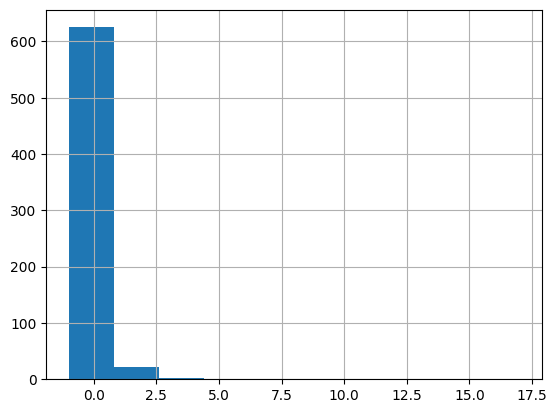

lh_pitch_set_lz


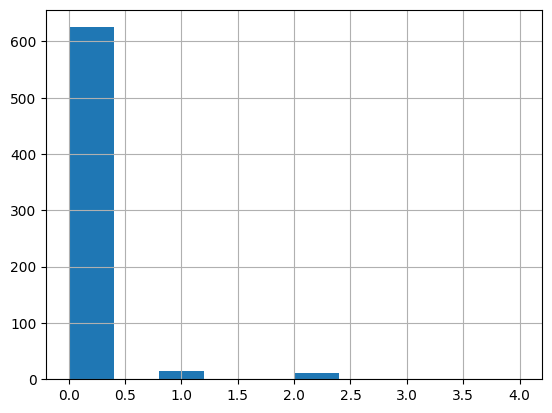

rh_pitch_range


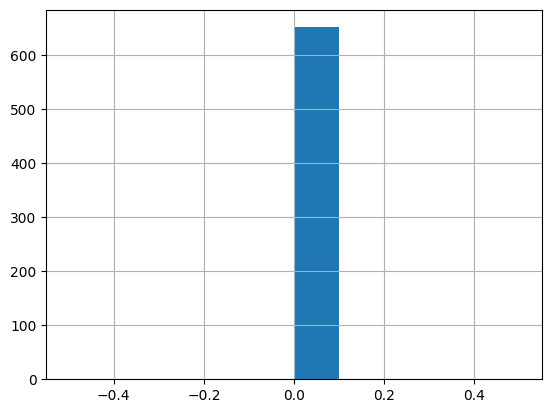

lh_pitch_range


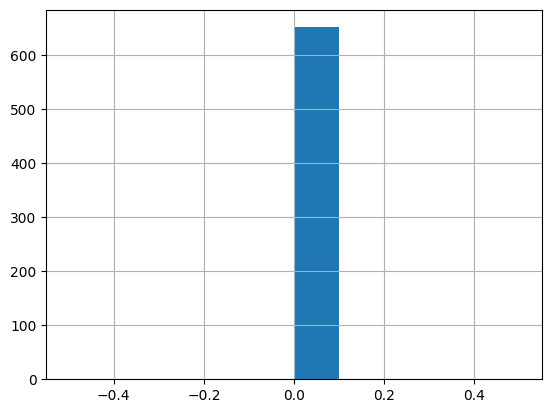

lh_average_pitch


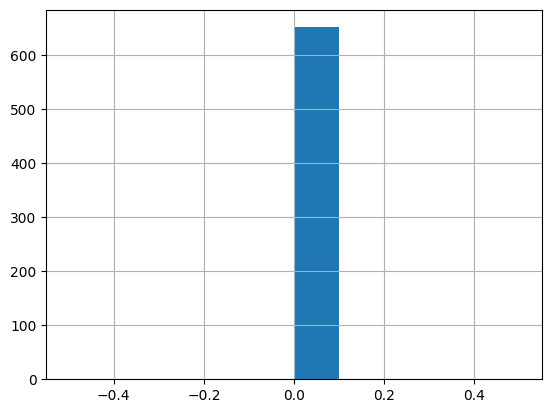

rh_average_pitch


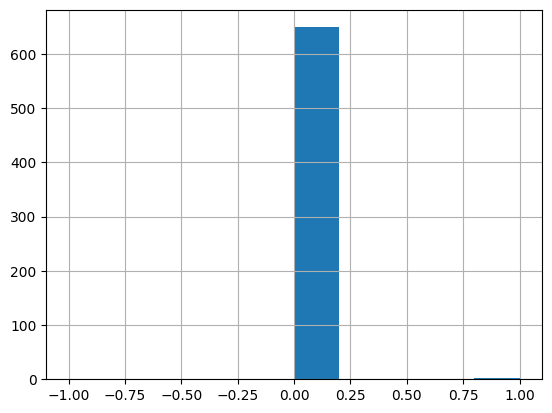

lh_average_ioi_seconds


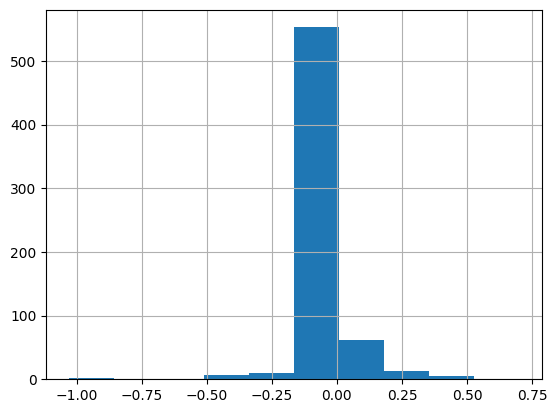

rh_average_ioi_seconds


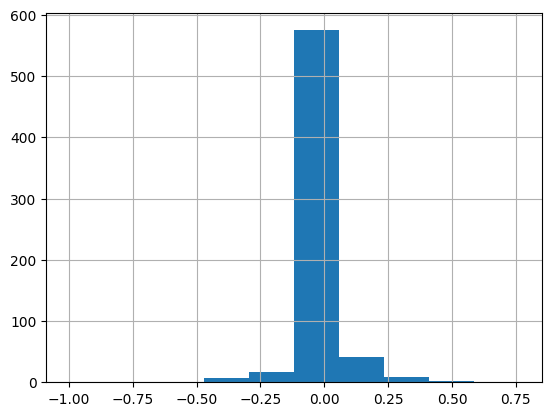

rh_displacement_rate


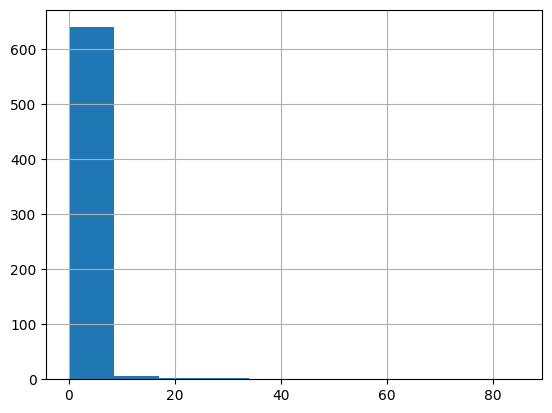

lh_displacement_rate


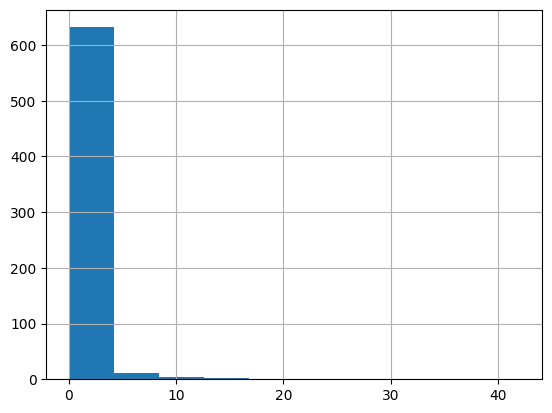

lh_pitch_entropy


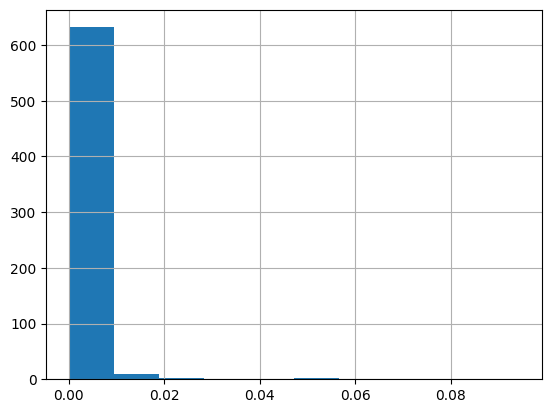

rh_pitch_entropy


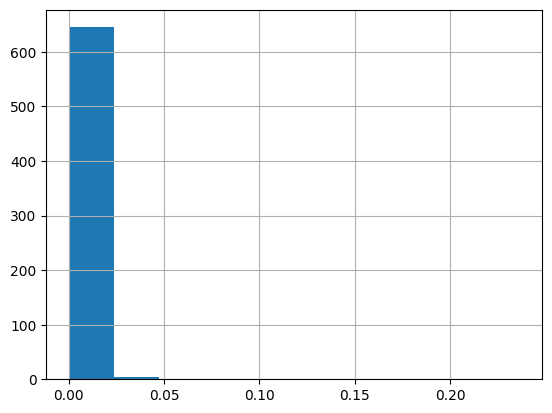

In [110]:
for column in columns_to_compare:
    print(column)
    (df["old_" + column] - df["new_" + column]).hist()
    plt.show()

In [111]:
ddf = df[np.abs(df.new_lh_displacement_rate - df.old_lh_displacement_rate)>0.1]
ddf[['new_lh_average_ioi_seconds', 'old_lh_average_ioi_seconds']]

,new_lh_average_ioi_seconds,old_lh_average_ioi_seconds
11,0.339432,0.339432
18,1.128072,1.128072
33,0.576793,0.576793
72,0.481872,0.481872
119,0.319111,0.319111
122,0.428476,0.428476
130,0.519489,0.571915
136,0.545872,0.545872
142,0.344121,0.344121
150,0.255418,0.255418


## Compare with actual current features

In [112]:
df_new = pd.read_json("current_difficulties.json")
columns_to_delete = set(df_new.columns)
columns_to_compare = ['rh_pitch_set_lz', 'lh_pitch_set_lz', 'rh_pitch_range',
       'lh_pitch_range', 'lh_average_pitch', 'rh_average_pitch',
       'lh_average_ioi_seconds', 'rh_average_ioi_seconds',
       'rh_displacement_rate', 'lh_displacement_rate', 'lh_pitch_entropy',
       'rh_pitch_entropy']
columns_to_delete = columns_to_delete - set(columns_to_compare)
columns_to_delete.remove('id')
columns_to_delete = list(columns_to_delete)
columns_to_delete, columns_to_compare

(['rh_pitch_stuff',
  'key_signatures',
  'lh_avg_horizontal_velocities2',
  'lh_ornaments',
  'joint_syncopation_weighted',
  'bpm_dev',
  'lh_avg_time_interval',
  'lh_syncopation_sum_salient',
  'grade',
  'new_lh_stamina',
  'rh_pitch_class_set_entropy_rate',
  'rh_horizontal_velocities2',
  'time_signature',
  'pitch_class_set_entropy',
  'lh_avg_playing_speed',
  'rh_avg_horizontal_velocities',
  'lh_syncopation_sum',
  'rh_syncopation_weighted',
  'rh_avg_horizontal_velocities2',
  'joint_syncopes_entropy',
  'joint_syncopation_sum_salient',
  'duration',
  'pitch_range',
  'lh_pitch_class_set_entropy',
  'sum_metric_entropy',
  'new_rh_syncopation_sum',
  'lh_stamina',
  'rh_pitch_set_entropy',
  'average_pitch',
  'predominant_time_signature',
  'lh_finger_sets',
  'lh_pitch_intervals',
  'naive_metric_divergence',
  'lh_chord_spreads',
  'rh_clef_changes',
  'rh_syncopation_weighted_salient',
  'tuplets',
  'lh_pitch_sets',
  'new_rh_naive_metric_entropy',
  'rh_key_pattern_e

In [113]:
df_new = df_new.drop(columns=columns_to_delete)
df_new.to_json("new_new_cipi.json", )
df_new = df_new.rename(columns = new_columns_map)
df = df_old.merge(df_new, left_on='id', right_on='id', how='inner')
df

,old_rh_pitch_set_lz,old_lh_pitch_set_lz,old_rh_pitch_range,old_lh_pitch_range,old_lh_average_pitch,old_rh_average_pitch,old_lh_average_ioi_seconds,old_rh_average_ioi_seconds,old_rh_displacement_rate,old_lh_displacement_rate,...,new_rh_pitch_range,new_lh_pitch_range,new_lh_average_ioi_seconds,new_rh_average_ioi_seconds,new_lh_average_pitch,new_rh_average_pitch,new_rh_displacement_rate,new_lh_displacement_rate,new_lh_pitch_entropy,new_rh_pitch_entropy
0,84,79,45,57,50,72,0.314774,0.242938,258,313,...,45,57,0.314774,0.242938,50,72,0.537500,0.845946,4.616734,4.160183
1,531,398,44,57,50,71,0.309765,0.201799,3737,2476,...,44,57,0.309765,0.201799,50,71,0.795445,0.844475,4.542325,4.254491
2,355,263,43,46,55,73,0.527353,0.342546,1689,2016,...,43,46,0.302349,0.196393,55,73,0.418691,0.874241,4.621077,4.361717
3,434,247,56,48,57,75,0.483582,0.251708,2163,907,...,56,48,0.483582,0.251708,57,75,0.558050,0.450795,4.345153,4.139526
4,428,476,60,45,50,69,0.385075,0.422892,1785,1170,...,60,45,0.385075,0.422892,50,69,0.888060,0.511364,4.740427,4.943907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,1430,1276,56,57,51,73,0.226819,0.233708,7141,9757,...,56,57,0.218455,0.225090,51,73,0.716249,0.958251,5.151156,5.222821
648,50,34,21,20,58,71,0.273354,0.149560,240,180,...,21,20,0.273354,0.149560,58,71,0.459770,0.714286,3.541592,3.807590
649,233,163,27,33,55,69,0.447692,0.312313,723,526,...,27,33,0.447692,0.312313,55,69,0.577476,0.610209,4.289890,4.247483
650,151,123,51,38,51,73,0.267382,0.527496,607,1037,...,51,38,0.267382,0.527496,51,73,0.608216,0.520060,4.267883,4.775934


In [114]:
for column in columns_to_compare:
    print(column, sum(np.abs(df["new_" + column] - df["old_" + column]) > 0.1))

rh_pitch_set_lz 29
lh_pitch_set_lz 27
rh_pitch_range 0
lh_pitch_range 0
lh_average_pitch 0
rh_average_pitch 3
lh_average_ioi_seconds 69
rh_average_ioi_seconds 61
rh_displacement_rate 650
lh_displacement_rate 652
lh_pitch_entropy 652
rh_pitch_entropy 651


rh_pitch_set_lz


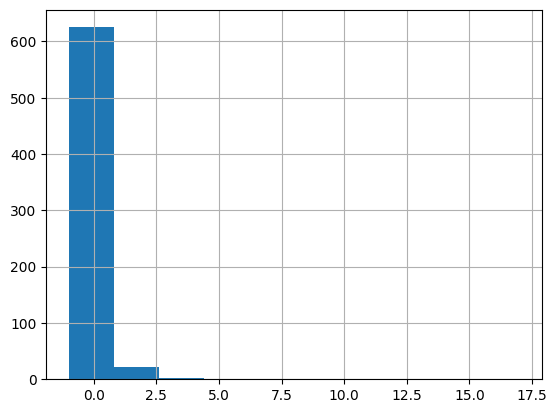

lh_pitch_set_lz


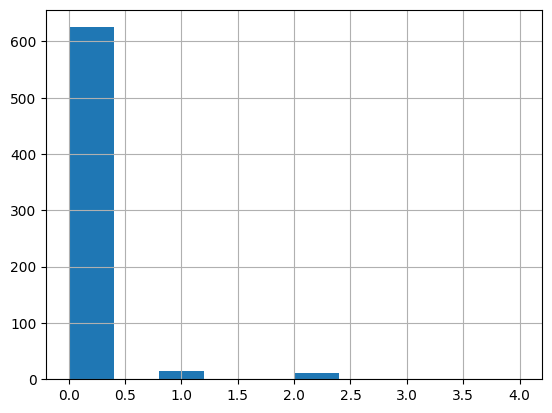

rh_pitch_range


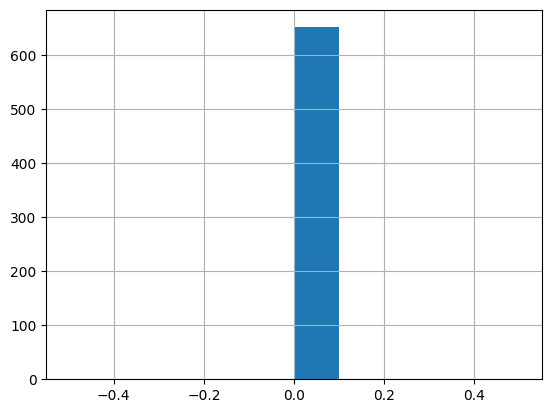

lh_pitch_range


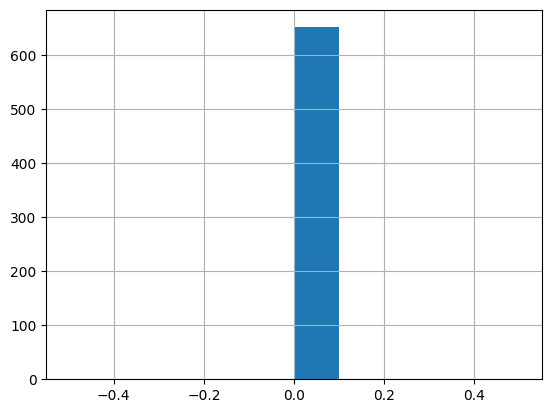

lh_average_pitch


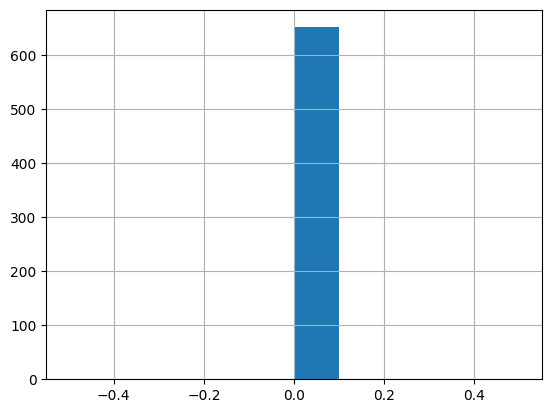

rh_average_pitch


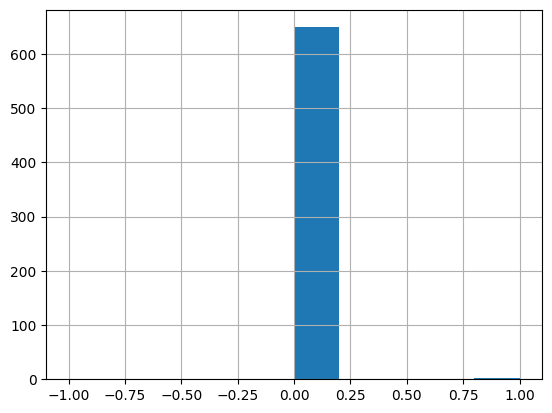

lh_average_ioi_seconds


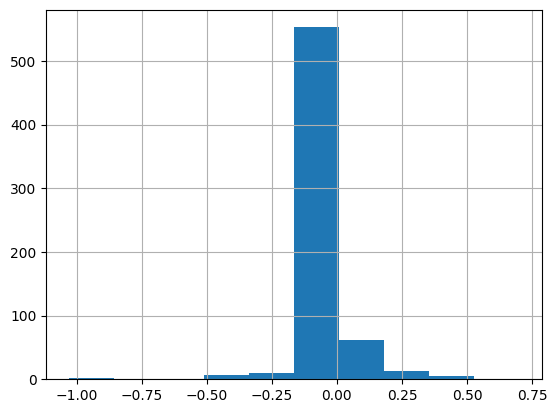

rh_average_ioi_seconds


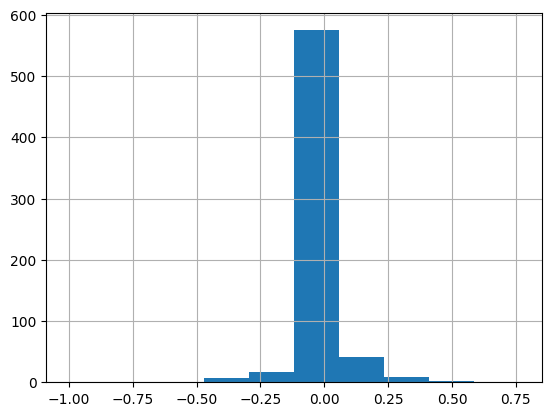

rh_displacement_rate


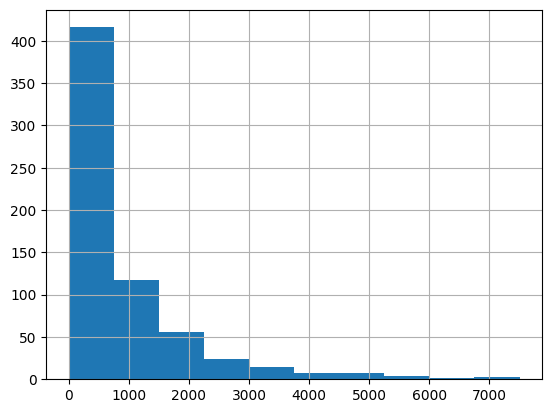

lh_displacement_rate


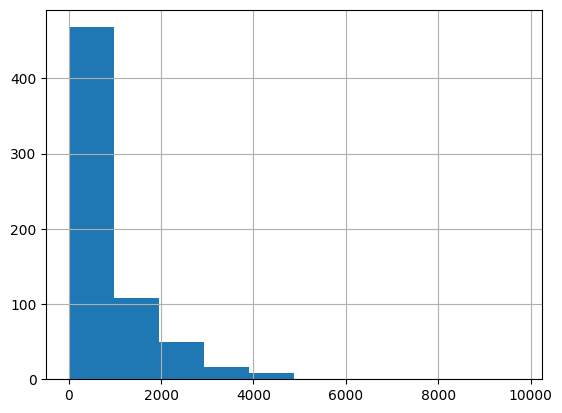

lh_pitch_entropy


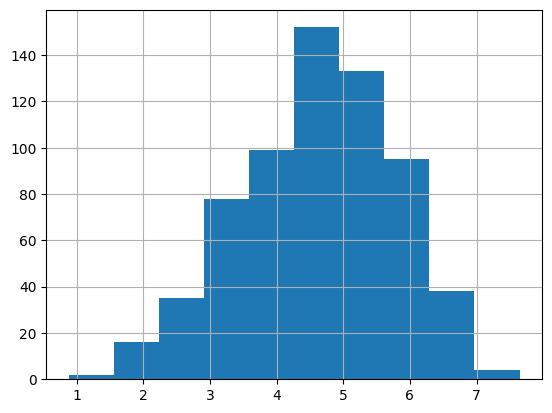

rh_pitch_entropy


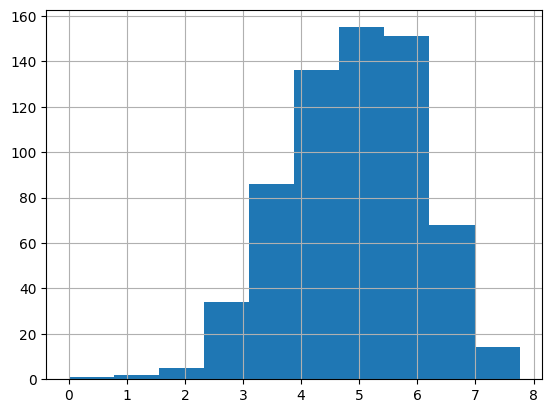

In [115]:
for column in columns_to_compare:
    print(column)
    (df["old_" + column] - df["new_" + column]).hist()
    plt.show()